In [62]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

## Keys are private , for keys go through  
https://towardsdatascience.com/tweepy-for-beginners-24baf21f2c25

In [63]:
api_key = ""
api_secret = ""
accessToken = ""
accessTokenSecret = ""

In [64]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(api_key,api_secret)  
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)  
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [65]:
combines = []
words=[["#covid19","death"], "pandemic", "lockdown"]

In [66]:
def tweets(search):
    date_since = "2020-06-27"

    posts = tweepy.Cursor(api.search,q =search,
                       geocode="20.5937,78.9629,3000km",
                       lang="en", since=date_since).items(100)
## the geocode is for India; format for geocode="lattitude,longitude,radius"
## radius should be in miles or km

    all_tweets = [tweet.text for tweet in posts]
    
    all_tweets=list(set(all_tweets))
    return all_tweets
    

In [68]:
for i in range(len(words)):  
    combines.extend(tweets(words[i]))

In [69]:
    df = pd.DataFrame(combines, columns=['Tweets'])
# Show the first 5 rows of data

In [74]:
df.head()

,Tweets
0,"In today’s coronavirus (COVID-19) statistics, ..."
1,RT @mannar_mannan: #COVID19 Tamil Nadu update ...
2,RT @pr_moph: 🇹🇭 Thailand situation update on C...
3,RT @GetNewsd: Aishwarya Rai and Aradhya Bachch...
4,RT @EastMojo: #CoronavirusUpdates: Of the tota...


In [ ]:
len(combines)

In [47]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['tweet_without_stopwords'] =df["Tweets"].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
df

,Tweets,tweet_without_stopwords
0,COVID-19 Positive Deaths 12.07.2020\n#Lockdown...,COVID-19 Positive Deaths 12.07.2020 #Lockdown ...
1,RT @flyspicejet: We’re breaking new grounds to...,RT @flyspicejet: We’re breaking new grounds en...
2,RT @NewIndianXpress: Biocon Ltd’s Itolizumab i...,RT @NewIndianXpress: Biocon Ltd’s Itolizumab f...
3,RT @AthaudaDasuni: 🚨 IMPORTANT 🏫 \n\nIf presen...,RT @AthaudaDasuni: 🚨 IMPORTANT 🏫 If present si...
4,"RT @ANI: Tamil Nadu reports 68 deaths, 4244 ne...","RT @ANI: Tamil Nadu reports 68 deaths, 4244 ne..."
...,...,...
203,Lockdown has reimposed \n#Staysafe \n#Stayhome...,Lockdown reimposed #Staysafe #Stayhome https:/...
204,RT @htpune: BJP steps up attack on government ...,RT @htpune: BJP steps attack government Lockdo...
205,"RT @indiatvnews: 5-day work week in UP now, of...","RT @indiatvnews: 5-day work week UP now, offic..."
206,Sunday Lockdown Special. Watch Akshay's Honest...,Sunday Lockdown Special. Watch Akshay's Honest...


In [48]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text

# Clean the tweets
df['tweet_without_stopwords'] = df['tweet_without_stopwords'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets,tweet_without_stopwords
0,COVID-19 Positive Deaths 12.07.2020\n#Lockdown...,COVID-19 Positive Deaths 12.07.2020 Lockdown T...
1,RT @flyspicejet: We’re breaking new grounds to...,: We’re breaking new grounds ensure well-being...
2,RT @NewIndianXpress: Biocon Ltd’s Itolizumab i...,: Biocon Ltd’s Itolizumab first novel biologic...
3,RT @AthaudaDasuni: 🚨 IMPORTANT 🏫 \n\nIf presen...,: 🚨 IMPORTANT 🏫 If present situation COVID-19 ...
4,"RT @ANI: Tamil Nadu reports 68 deaths, 4244 ne...",": Tamil Nadu reports 68 deaths, 4244 new COVID..."
...,...,...
203,Lockdown has reimposed \n#Staysafe \n#Stayhome...,Lockdown reimposed Staysafe Stayhome
204,RT @htpune: BJP steps up attack on government ...,: BJP steps attack government Lockdown 3.0 Pun...
205,"RT @indiatvnews: 5-day work week in UP now, of...",": 5-day work week UP now, offices markets rema..."
206,Sunday Lockdown Special. Watch Akshay's Honest...,Sunday Lockdown Special. Watch Akshay's Honest...


In [49]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['tweet_without_stopwords'].apply(getSubjectivity)
df['Polarity'] = df['tweet_without_stopwords'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,tweet_without_stopwords,Subjectivity,Polarity
0,COVID-19 Positive Deaths 12.07.2020\n#Lockdown...,COVID-19 Positive Deaths 12.07.2020 Lockdown T...,0.545455,0.227273
1,RT @flyspicejet: We’re breaking new grounds to...,: We’re breaking new grounds ensure well-being...,0.577273,0.435227
2,RT @NewIndianXpress: Biocon Ltd’s Itolizumab i...,: Biocon Ltd’s Itolizumab first novel biologic...,0.333333,0.250000
3,RT @AthaudaDasuni: 🚨 IMPORTANT 🏫 \n\nIf presen...,: 🚨 IMPORTANT 🏫 If present situation COVID-19 ...,0.390000,0.030000
4,"RT @ANI: Tamil Nadu reports 68 deaths, 4244 ne...",": Tamil Nadu reports 68 deaths, 4244 new COVID...",0.573864,0.147727
...,...,...,...,...
203,Lockdown has reimposed \n#Staysafe \n#Stayhome...,Lockdown reimposed Staysafe Stayhome,0.000000,0.000000
204,RT @htpune: BJP steps up attack on government ...,: BJP steps attack government Lockdown 3.0 Pun...,0.000000,0.000000
205,"RT @indiatvnews: 5-day work week in UP now, of...",": 5-day work week UP now, offices markets rema...",0.100000,-0.100000
206,Sunday Lockdown Special. Watch Akshay's Honest...,Sunday Lockdown Special. Watch Akshay's Honest...,0.735714,0.478571


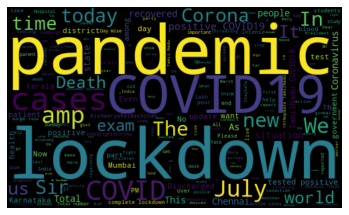

In [50]:
allWords = ' '.join([twts for twts in df['tweet_without_stopwords']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [51]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,tweet_without_stopwords,Subjectivity,Polarity,Analysis
0,COVID-19 Positive Deaths 12.07.2020\n#Lockdown...,COVID-19 Positive Deaths 12.07.2020 Lockdown T...,0.545455,0.227273,Positive
1,RT @flyspicejet: We’re breaking new grounds to...,: We’re breaking new grounds ensure well-being...,0.577273,0.435227,Positive
2,RT @NewIndianXpress: Biocon Ltd’s Itolizumab i...,: Biocon Ltd’s Itolizumab first novel biologic...,0.333333,0.250000,Positive
3,RT @AthaudaDasuni: 🚨 IMPORTANT 🏫 \n\nIf presen...,: 🚨 IMPORTANT 🏫 If present situation COVID-19 ...,0.390000,0.030000,Positive
4,"RT @ANI: Tamil Nadu reports 68 deaths, 4244 ne...",": Tamil Nadu reports 68 deaths, 4244 new COVID...",0.573864,0.147727,Positive
...,...,...,...,...,...
203,Lockdown has reimposed \n#Staysafe \n#Stayhome...,Lockdown reimposed Staysafe Stayhome,0.000000,0.000000,Neutral
204,RT @htpune: BJP steps up attack on government ...,: BJP steps attack government Lockdown 3.0 Pun...,0.000000,0.000000,Neutral
205,"RT @indiatvnews: 5-day work week in UP now, of...",": 5-day work week UP now, offices markets rema...",0.100000,-0.100000,Negative
206,Sunday Lockdown Special. Watch Akshay's Honest...,Sunday Lockdown Special. Watch Akshay's Honest...,0.735714,0.478571,Positive


In [52]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['tweet_without_stopwords'][i])
    print()
    j= j+1

Printing positive tweets:

1) COVID-19 Positive Deaths 12.07.2020 Lockdown TamilNadu Corona StaySafe COVID19 TN 

2) : We’re breaking new grounds ensure well-being! We’re delighted introduce insurance COVID-19 hospitali…

3) : Biocon Ltd’s Itolizumab first novel biologic therapy approved world treating patients mod…

4) : 🚨 IMPORTANT 🏫 If present situation COVID-19 becomes worse, schools &amp; educational institutions WILL BE CLOSED AG…

5) : Tamil Nadu reports 68 deaths, 4244 new COVID19 positive cases 3,617 discharges today. The total number positive cases stan…

6) 108: It sad news AmitabhBachhan Sir son AbhishekBachchan confirmed COVID19 positive. . But G…

7) : More bad news covid-19 front. Now new study says covid-19 fatal patients high blood…

8) : Kerala Covid19 update: 435 new positive cases today. 128 cases abroad. 87 cases states. 206 through…

9) : Kes positif mengikut negeri (setakat 12/07/2020, 12 pm) Confirmed cases state (as 12/07/2020, 12 pm) COVID19 Kit…

10) : Breaki

In [53]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['tweet_without_stopwords'][i])
    print()
    j=j+1

Printing negative tweets:

1) : Sad hear AishwaryaRaiBachchan &amp; daughter Covid positive. I wish Bachchan sir &amp; entire family memb…

2) IndiaFightsCorona Dr. Harsh Vardhan visits Sardar Patel COVID19 Care Centre &amp; Hospital Chhattarpur. Commends… 

3) : This Notice claims COVID19 Monitoring Committee formed Fake. Such committee been…

4) 50: TamilNadu COVID19 cases Today, July 12 - 4244 COVID cases state every day 4000 + due increasing cases districts. T…

5) 2: Now India 3rd Rank grph COVID19 ovr world Many Bollywood stars also infectd CORONA How St…

6) _India: UPDATES ON COVID19 👉More 5.3 lakh recover; active cases 2.9 lakh 👉2.4 lakh recovered cases active cases…

7) : A short prose failed global leaderships. COVID19 Racism Bigotry Humanrights environment FreedomOfSpeech Casteism …

8) 10: It absolutely unfair ask students sit exams middle pandemic. Plz conduct exams COVID1…

9) : Over five lakh people recovered COVID-19 India far. Due surge coronavirus cases, Karnataka go

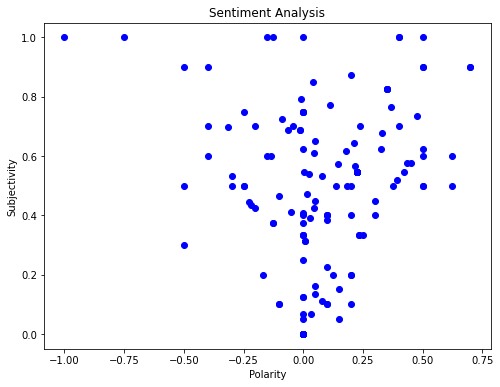

In [54]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [55]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['tweet_without_stopwords']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

38.9

In [56]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['tweet_without_stopwords']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

16.8

In [57]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     92
Positive    81
Negative    35
Name: Analysis, dtype: int64

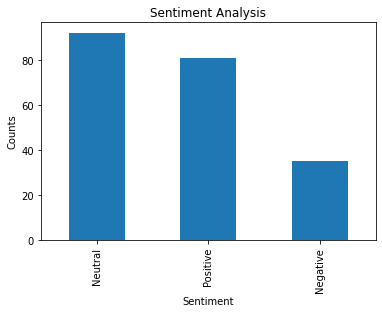

In [58]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()